In [7]:
from projectq import MainEngine
from projectq.meta import Control
from projectq.ops import CNOT, H, X, Measure, All
from projectq.backends import CircuitDrawer

In [8]:
draw_bnd = CircuitDrawer()
eng = MainEngine(draw_bnd)

In [9]:
qc = eng.allocate_qubit()
qt = eng.allocate_qubit()
qtt = eng.allocate_qubit()

In [10]:
H | qc 

In [11]:
with Control(eng, qc):
    X | qt
    H | qt
    with Control(eng, qt):
        X | qtt

In [13]:
All(Measure) | [qc, qt, qtt]

In [14]:
eng.flush()

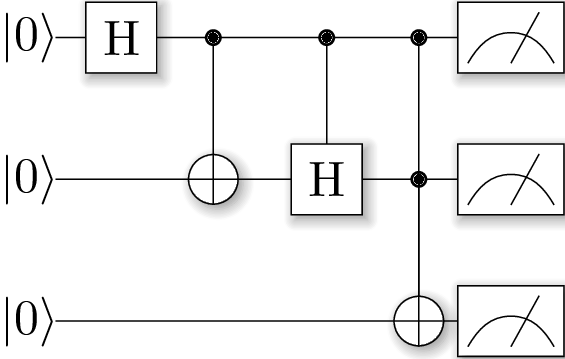

In [15]:
from subprocess import call
from IPython.display import Image

circName = 'meta_control_circ'

f = open(circName+'.tex','w')
f.write(draw_bnd.get_latex())
f.close()

call(['pdflatex', circName+'.tex'])
call(['convert', '-density', '450',circName+'.pdf', circName+'.png'])
call(['cp', circName+'.pdf', '../slides/pics'])

Image(circName+'.png')